In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import accuracy_score

import scipy.stats as st

import seaborn as sns
sns.set_style('dark')

#import csv
data = pd.read_csv('vgsales.csv')


In [43]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [10]:
data.shape

(16250, 11)

In [11]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [15]:
data.Genre[data.Genre == 'Action'] = 1
data.Genre[data.Genre == 'Sports'] = 2
data.Genre[data.Genre == 'Misc'] = 3
data.Genre[data.Genre == 'Role-Playing'] = 4
data.Genre[data.Genre == 'Shooter'] = 5
data.Genre[data.Genre == 'Adventure'] = 6
data.Genre[data.Genre == 'Racing'] = 7
data.Genre[data.Genre == 'Platform'] = 8
data.Genre[data.Genre == 'Simulation'] = 9
data.Genre[data.Genre == 'Fighting'] = 10
data.Genre[data.Genre == 'Strategy'] = 11
data.Genre[data.Genre == 'Puzzle'] = 12

data.astype({'Genre':'int64'}).dtypes

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Rank              int64
Name             object
Platform         object
Year            float64
Genre             int64
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

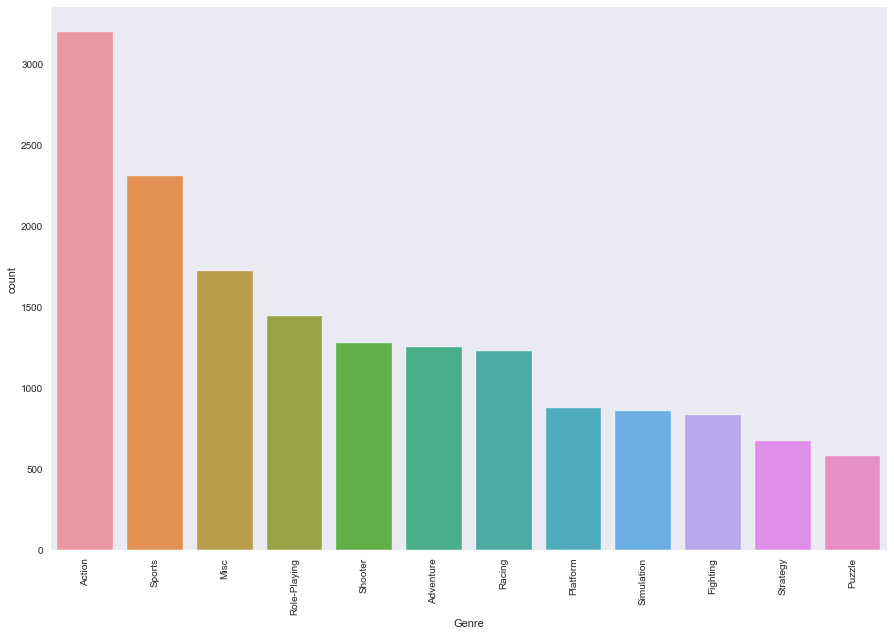

In [3]:
#Most genres of video games released 
plt.figure(figsize = (15, 10))
sns.countplot(x = "Genre", data = data, order = data ['Genre'].value_counts().index)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1990.0'),
  Text(32, 0, '1987.0'),
  T

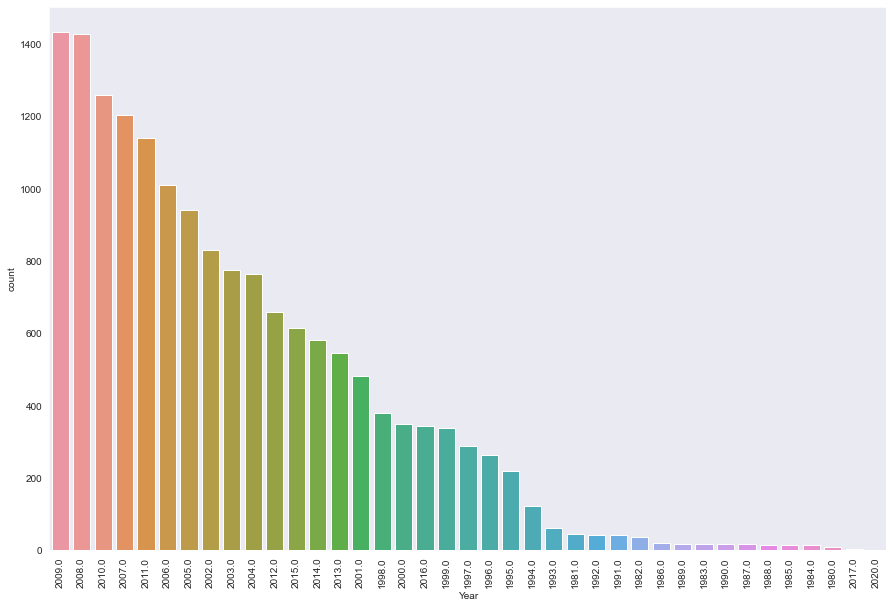

In [17]:
#Years that had the most release
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

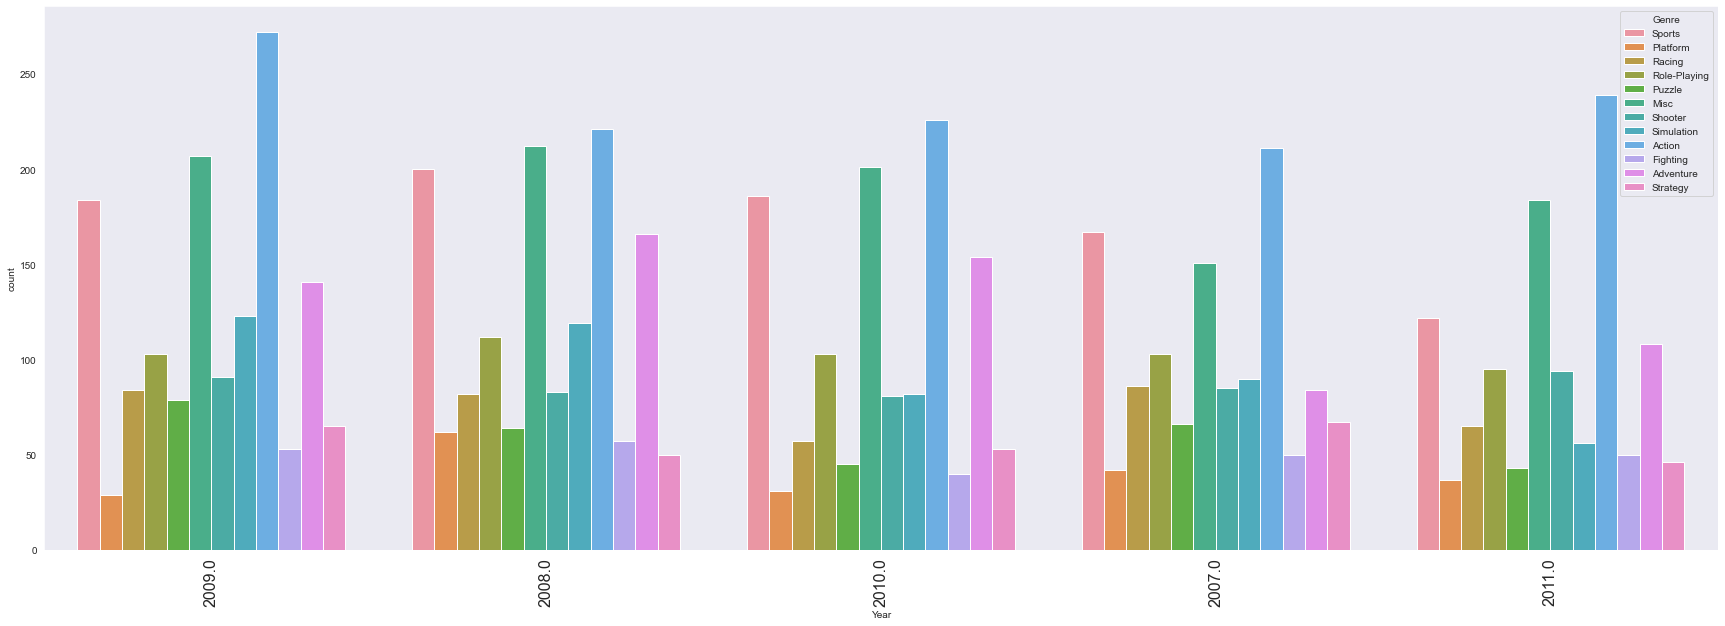

In [18]:
#Top 5 years of games release by genre
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [20]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Mystique                           1
WayForward Technologies            1
Image Epoch                        1
CPG Products                       1
Quest                              1
Name: Publisher, Length: 578, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

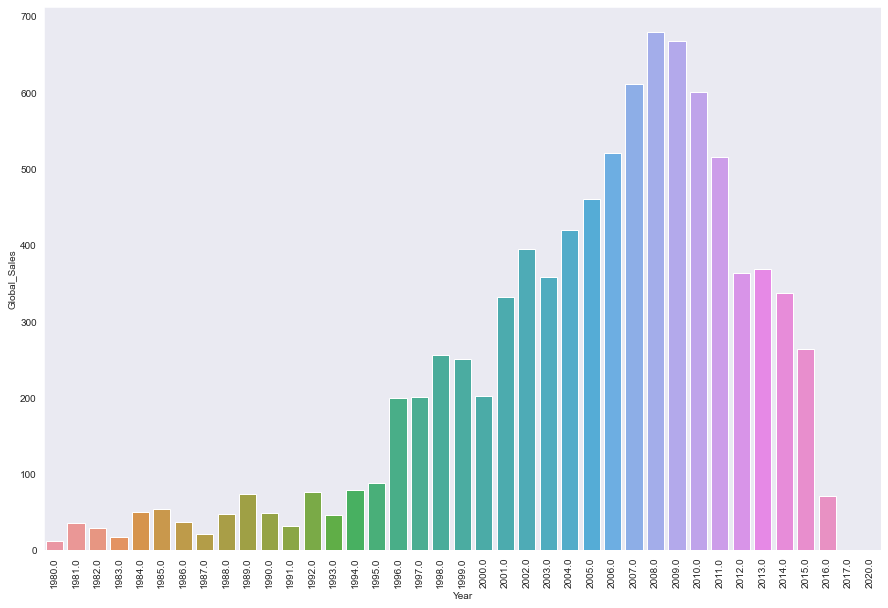

In [24]:
#Years that have the highest sales
yearly_sales = data.groupby(by=['Year'])['Global_Sales'].sum()
yearly_sales = yearly_sales.reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="Year", y="Global_Sales", data=yearly_sales)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

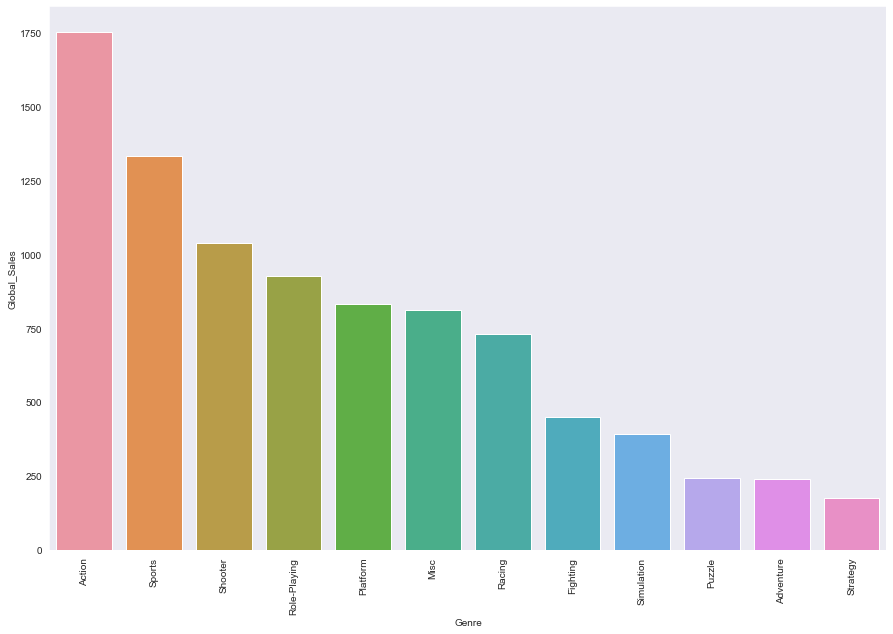

In [26]:
#Genres that have the highest sales globally
genre_sales = data.groupby(by=['Genre'])['Global_Sales'].sum()
genre_sales = genre_sales.reset_index()
genre_sales = genre_sales.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=genre_sales)
plt.xticks(rotation=90)

In [27]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
#Train and test split data

y = data.Global_Sales
x = data.drop('Global_Sales', axis = 1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [33]:
x_train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8731,8733,Bomberman,PSP,2006.0,Puzzle,Konami Digital Entertainment,0.14,0.00,0.00,0.01
12304,12306,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2009.0,Misc,D3Publisher,0.00,0.00,0.06,0.00
5924,5926,Full Spectrum Warrior,PS2,2005.0,Strategy,THQ,0.15,0.11,0.00,0.04
9827,9829,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.03,0.00,0.01
1500,1502,IHRA Drag Racing 2,PS2,2002.0,Racing,Bethesda Softworks,0.64,0.50,0.00,0.17


In [35]:
x_train.shape

(11618, 10)

In [36]:
x_train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8731,8733,Bomberman,PSP,2006.0,Puzzle,Konami Digital Entertainment,0.14,0.00,0.00,0.01
12304,12306,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2009.0,Misc,D3Publisher,0.00,0.00,0.06,0.00
5924,5926,Full Spectrum Warrior,PS2,2005.0,Strategy,THQ,0.15,0.11,0.00,0.04
9827,9829,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.03,0.00,0.01
1500,1502,IHRA Drag Racing 2,PS2,2002.0,Racing,Bethesda Softworks,0.64,0.50,0.00,0.17


In [37]:
x_test.shape

(4980, 10)

In [38]:
x_test.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14248,14251,Ukiyo no Shishi,PS3,2015.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00
3681,3683,Metro 2033,X360,2010.0,Shooter,THQ,0.22,0.24,0.03,0.05
14369,14372,Guilty Gear XX Accent Core Plus,Wii,2009.0,Fighting,PQube,0.01,0.02,0.00,0.00
2261,2263,Disney Magical World,3DS,2013.0,Adventure,Nintendo,0.16,0.20,0.53,0.03
7424,7426,Angel Blade: Neo Tokyo Guardians,PS,1997.0,Role-Playing,On Demand,0.12,0.08,0.00,0.01


In [46]:
data = pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
data['Genre'].value_counts()

1     3196
2     2308
3     1721
4     1446
5     1278
6     1252
7     1229
8      876
9      857
10     834
11     671
12     582
Name: Genre, dtype: int64

In [17]:
X = data[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [18]:
X

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2,41.49,29.02,3.77,8.46,82.74
1,8,29.08,3.58,6.81,0.77,40.24
2,7,15.85,12.88,3.79,3.31,35.82
3,2,15.75,11.01,3.28,2.96,33.00
4,4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,8,0.01,0.00,0.00,0.00,0.01
16594,5,0.01,0.00,0.00,0.00,0.01
16595,7,0.00,0.00,0.00,0.00,0.01
16596,12,0.00,0.01,0.00,0.00,0.01


In [19]:
scaler = preprocessing.StandardScaler().fit(X)
data_scaled = scaler.transform(X)

In [25]:
Feature_scaled = data_scaled[:,0:5]
Label_scaled = data_scaled[:,5]

In [26]:
Feature_scaled

array([[-0.85140233, 49.99880813, 56.72056984, 11.82434559, 44.20872927],
       [ 0.9457773 , 34.94618763,  6.74209291, 21.56212057,  3.7914741 ],
       [ 0.64624737, 18.89895402, 25.01252669, 11.8884099 , 17.14125669],
       ...,
       [ 0.64624737, -0.32618981, -0.29104181, -0.25177668, -0.25550724],
       [ 2.14389706, -0.32618981, -0.27139619, -0.25177668, -0.25550724],
       [ 0.9457773 , -0.31406038, -0.29104181, -0.25177668, -0.25550724]])

In [27]:
Label_scaled

array([52.38166217, 25.29718207, 22.48039614, ..., -0.34066815,
       -0.34066815, -0.34066815])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(Feature_scaled, Label_scaled,test_size = 0.3, random_state = 0)

In [36]:
#Decision Tree for Test data

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([-0.2896856 , -0.33411831,  0.39857884, ..., -0.20683895,
       -0.32792251, -0.32792251])

In [34]:
#Mean Absolute Error
print('MAE= ', mean_absolute_error(y_predict, y_test))

print('RMSE= ', np.sqrt(mean_absolute_error(y_predict, y_test)))

MAE=  0.028269418060467916
RMSE=  0.1681351184627052


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


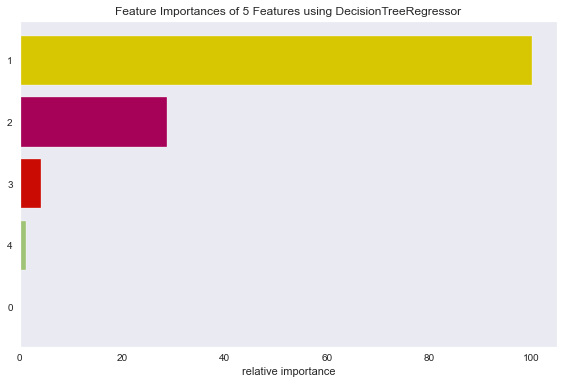

<AxesSubplot:title={'center':'Feature Importances of 5 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [35]:
plot = FeatureImportances(model)
plot.fit(Feature_scaled, Label_scaled)
plot.show()

In [40]:
#Linear Regression 

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg.score(x_train, y_train)
y_pred

array([-0.28954207, -0.33411295,  0.38599789, ..., -0.20668145,
       -0.32764172, -0.3277169 ])

In [41]:
#Mean Absolute Error
print('MAE= ', mean_absolute_error(y_pred, y_test))

print('RMSE= ', np.sqrt(mean_absolute_error(y_pred, y_test)))

MAE=  0.001837754033149066
RMSE=  0.04286903349912459


In [42]:
#Slope and Intercept
print('Slope:' ,reg.coef_)
print('Intercept:', reg.intercept_)

Slope: [4.11568603e-05 5.25358527e-01 3.24374562e-01 1.98906376e-01
 1.21205189e-01]
Intercept: -2.3416158701830385e-05


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


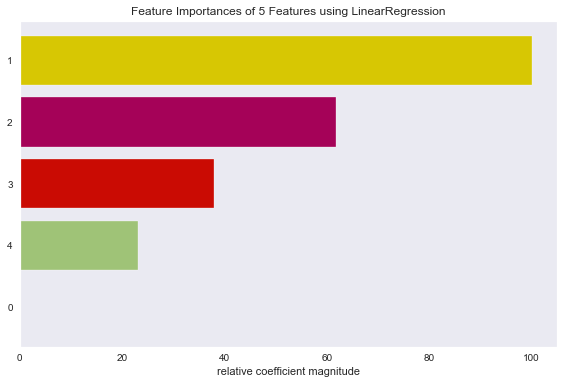

<AxesSubplot:title={'center':'Feature Importances of 5 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [44]:
plot2 = FeatureImportances(reg)
plot2.fit(Feature_scaled, Label_scaled)
plot2.show()

AttributeError: 'LinearRegression' object has no attribute 'value'